In [16]:
#importing necessary libraries
import pandas as pd
import warnings
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, bigrams, trigrams

In [17]:
df=pd.read_csv(r'C:\Users\Asus\Desktop\btp\Final_Dataset1.csv')

In [18]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,Time,Tweet
0,0,0,1.578530e+18,2023-02-13 17:09:44+00:00,b'runny nose tear eyes fever headache loss of ...
1,1,1,4.904996e+07,2023-02-13 15:34:08+00:00,b'@katkinneywrites i have hot/cold sometimes. ...
2,2,2,9.234178e+07,2023-02-13 13:57:31+00:00,b'cytomegalovirus colitis - complication when ...
3,3,3,1.179430e+18,2023-02-13 11:38:54+00:00,b'@fatalkci l know otli and matli for nausea a...
4,4,4,8.566819e+08,2023-02-13 01:57:45+00:00,b'went from a fever to a cough to a sore throa...


In [19]:
df1=df.drop('Unnamed: 0',axis=1)

In [20]:
df1.head()

,Unnamed: 0.1,id,Time,Tweet
0,0,1.578530e+18,2023-02-13 17:09:44+00:00,b'runny nose tear eyes fever headache loss of ...
1,1,4.904996e+07,2023-02-13 15:34:08+00:00,b'@katkinneywrites i have hot/cold sometimes. ...
2,2,9.234178e+07,2023-02-13 13:57:31+00:00,b'cytomegalovirus colitis - complication when ...
3,3,1.179430e+18,2023-02-13 11:38:54+00:00,b'@fatalkci l know otli and matli for nausea a...
4,4,8.566819e+08,2023-02-13 01:57:45+00:00,b'went from a fever to a cough to a sore throa...


In [23]:
#import stop words text file
stop_words_file = r'C:\Users\Asus\Desktop\btp\Final_Dataset1.csv'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words

In [24]:
def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [25]:
df1['prep'] = df1['Tweet'].apply(preprocess)  

In [26]:
df1.head()

,Unnamed: 0.1,id,Time,Tweet,prep
0,0,1.578530e+18,2023-02-13 17:09:44+00:00,b'runny nose tear eyes fever headache loss of ...,nidk
1,1,4.904996e+07,2023-02-13 15:34:08+00:00,b'@katkinneywrites i have hot/cold sometimes. ...,katkinneywrit http h vvxvkitf
2,2,9.234178e+07,2023-02-13 13:57:31+00:00,b'cytomegalovirus colitis - complication when ...,cytomegaloviru microl hemorrhag http guff xami
3,3,1.179430e+18,2023-02-13 11:38:54+00:00,b'@fatalkci l know otli and matli for nausea a...,fatalkci nsar darad nbukhar ntakleef http qkakgmb
4,4,8.566819e+08,2023-02-13 01:57:45+00:00,b'went from a fever to a cough to a sore throa...,


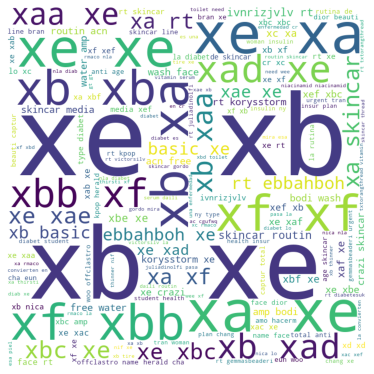

In [11]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df1["prep"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [12]:
df1.to_csv('prepdata2.csv')

In [18]:
data_symptoms=pd.read_csv('disease and symptoms.csv',encoding = "ISO-8859-1")

ParserError: Error tokenizing data. C error: Expected 10 fields in line 3, saw 81
